<a href="https://colab.research.google.com/github/gustavo-ifusp/exercicios_programacao_usp/blob/main/EP_3_Calculo_numerico_Gustavo_de_andrade_8669592.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3o. PROGRAMA - Integração Numérica

Gustavo de Andrade - Nº USP - 8669592

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import random

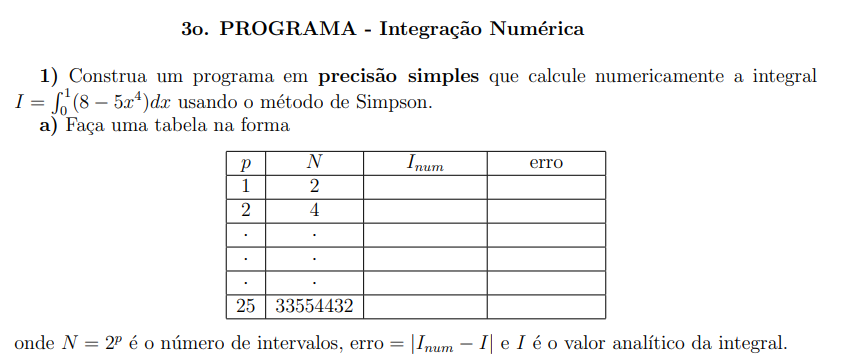

Conforme a fórmula de Simpson, segue a solução utilizando código Python:

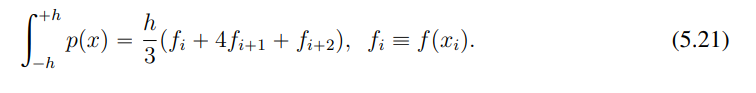

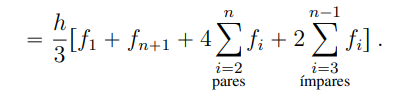

E o erro:

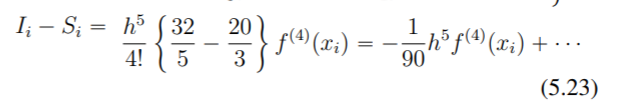

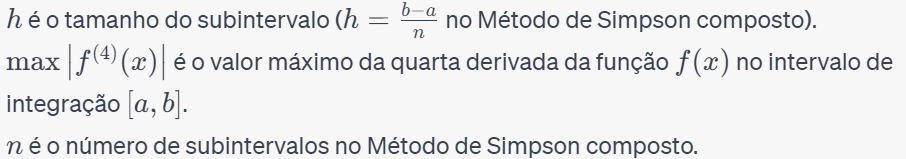

In [ ]:
# Função a ser integrada
def funcao(x):
  return 8 - 5 * x**4

In [ ]:
# retorna o resultado para um x chamado
def funcao_resultado(x):
  y = 8 - 5 * x**4
  return y

In [ ]:
#teste da função resultado
print("x=0:",funcao_resultado(0),"; x=1:",funcao_resultado(1),"; x=2:",funcao_resultado(2),"; x=3:", funcao_resultado(3),"; x=4:", funcao_resultado(4))

x=0: 8 ; x=1: 3 ; x=2: -72 ; x=3: -397 ; x=4: -1272


In [ ]:
# Sendo os limites de integração a e b e n o número de intervalos entre os limites
def integral_simpson(a, b, n):
  h = (b - a) / n
  x = np.linspace(a, b, n + 1)
  y = funcao(x)
  resultado = (h / 3) * (y[0] + 4 * np.sum(y[1::2]) + 2 * np.sum(y[2:-2:2]) + y[-1])
  return resultado

In [ ]:
#Função de forma analitica
def valor_analitico(a, b):
  return (8 * (b - a) - (5/5) * (b**5 - a**5))

In [ ]:
# Função para calcular o valor absoluto do erro de acordo com a fórmula fornecida
def calcular_erro_simpson_formula(a, b, n):
  h = (b - a) / n
  max_derivada_quarta = max(abs(4 * (x**3) + 6 * x**2) for x in np.linspace(a, b, n + 1))
  erro = abs((h**5 / 4) * (32/5 - 20/3) * max_derivada_quarta)
  return erro

In [ ]:
def imprimir_tabela_de_erro(a, b, n):
  m = 1
  tabela = []
  while m <= n:
    resultado = integral_simpson(a, b, m)
    erro = calcular_erro_simpson_formula(a, b, m)
    tabela.append([m, 2 ** m, resultado, erro])
    df = pd.DataFrame(tabela, columns=['P', 'N', 'Resultado', 'Erro'])
    df = df.set_index('P')
    m += 1
  return df

In [ ]:
a = 0
b = 1
n = 25

In [ ]:
imprimir_tabela_de_erro(a, b, n)

,N,Resultado,Erro
P,,,
1,2,7.666667,6.666667e-01
2,4,6.958333,2.083333e-02
3,8,6.083676,2.743484e-03
4,16,6.997396,6.510417e-04
5,32,6.674667,2.133333e-04
6,64,6.999486,8.573388e-05
7,128,6.856092,3.966601e-05
8,256,6.999837,2.034505e-05
9,512,6.930961,1.129006e-05


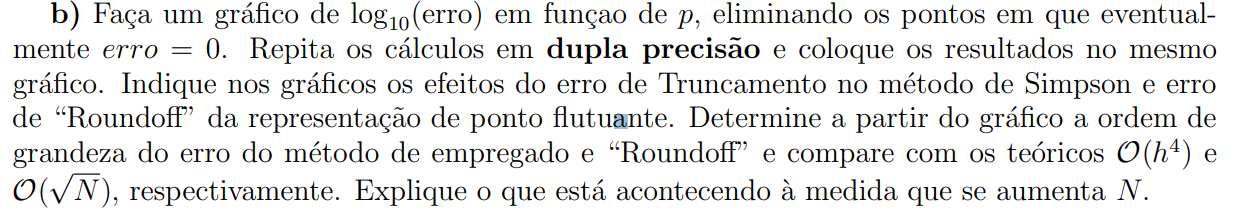

In [ ]:
def calcular_log_erro(a, b, n):
  P_valores = []
  erro_log = []
  m = 1
  while m <= n:
    erro = calcular_erro_simpson_formula(a, b, m)
    if erro != 0:
      P_valores.append(m)
      erro_log.append(np.log10(erro))
    m += 1
  return P_valores, erro_log

In [ ]:
P_log, erro_log = calcular_log_erro(a, b, n)
print(P_valores, erro_log)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25] [-0.17609125905568135, -1.6812412373755874, -2.5616975326539935, -3.1863912156954934, -3.670941280735775, -4.0668475109739, -4.401581459126966, -4.691541194015399, -4.947303806252306, -5.176091259055681, -5.383054684846806, -5.571997489293806, -5.745808020589865, -5.906731437446871, -6.056547554334087, -6.1966911723353055, -6.328335865947051, -6.452453784572212, -6.5698592638198265, -6.681241237375588, -6.787187732725278, -6.888204663166713, -6.984730439143646, -7.077147467613711, -7.165791302415869]


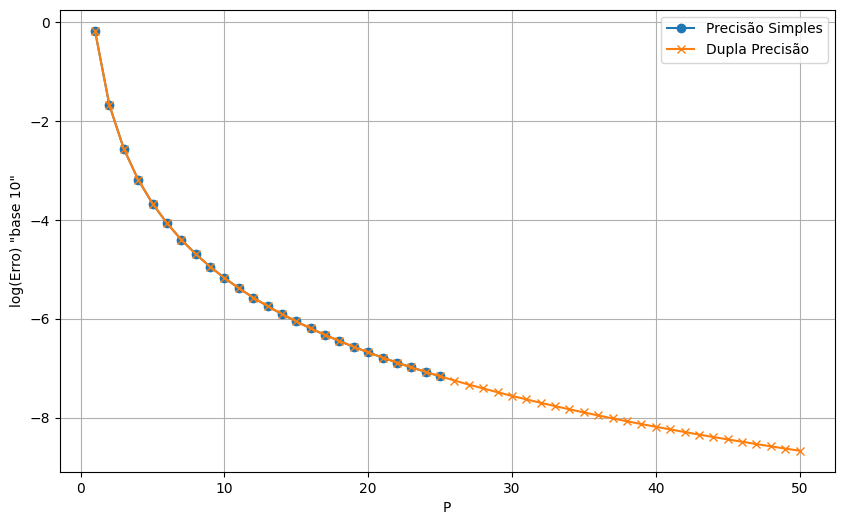

In [ ]:
# resultados em precisão simples (1 precisao = 25 pontos)
plt.figure(figsize=(10, 6))
plt.plot(P_log, erro_log, label='Precisão Simples', marker='o')

# resultados em precisão dupla
n_2 = 50
P_log, erro_log = calcular_log_erro(a, b, n_2)

plt.plot(P_log, erro_log, label='Dupla Precisão', marker='x')
plt.xlabel('P')
plt.ylabel('log(Erro) "base 10"')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
imprimir_tabela_de_erro(a, b, n_2) #tabela de erro com precisão dupla

,N,Resultado,Erro
P,,,
1,2,7.666667,6.666667e-01
2,4,6.958333,2.083333e-02
3,8,6.083676,2.743484e-03
4,16,6.997396,6.510417e-04
5,32,6.674667,2.133333e-04
6,64,6.999486,8.573388e-05
7,128,6.856092,3.966601e-05
8,256,6.999837,2.034505e-05
9,512,6.930961,1.129006e-05


O erro na regra de Simpson diminuirá conforme aumentar o valor de n, ou seja, o número de subintervalos. Se a função que está sendo integrada for bem comportada, significa que sua segunda derivada é limitada.
No gráfico de log(erro) na base 10 estamos vendo o valor se tornando mais negativo, sugerindo que o método de cálculo está convergindo para uma solução mais precisa.

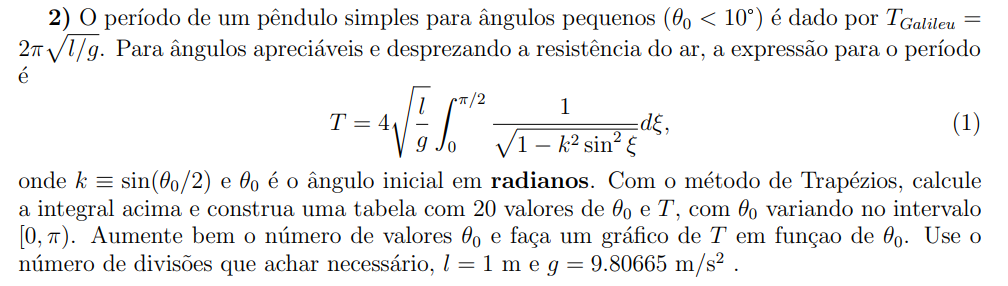

Conforema a equação 5.12 das notas de aula:

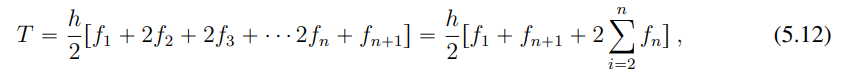

In [ ]:
# Função
def f(E, k):
  return 1 / math.sqrt(1 - k**2 * (math.sin(E)**2))

In [ ]:
l = 1  # Comprimento do pêndulo em metros
g = 9.80665  # gravidade em m/s^2
n = 20  # Número de divisões (20 valores de Θ)
a = 0 # a e b os limies de integração
b = math.pi / 2

In [ ]:
# Cálculo de k
theta_graus = np.linspace(0, 170, n)  # Valores de Θ em graus (ajustado para evitar k=1)
theta_radiano = np.deg2rad(theta_graus)  # Converter para radianos
k_valor = np.sin(theta_radiano / 2)

In [ ]:
print(theta_em_graus,theta_radiano, k_valor)

[  0.           9.47368421  18.94736842  28.42105263  37.89473684
  47.36842105  56.84210526  66.31578947  75.78947368  85.26315789
  94.73684211 104.21052632 113.68421053 123.15789474 132.63157895
 142.10526316 151.57894737 161.05263158 170.52631579 180.        ] [0.         0.15616104 0.31232208 0.46848312 0.62464415 0.78080519
 0.93696623 1.09312727 1.24928831 1.40544935 1.56161038 1.71777142
 1.87393246 2.0300935  2.18625454 2.34241558 2.49857661 2.65473765
 2.81089869 2.96705973] [0.         0.07800121 0.15552711 0.23210532 0.3072692  0.38056075
 0.45153336 0.51975456 0.58480866 0.64629924 0.70385161 0.75711509
 0.80576511 0.84950522 0.88806889 0.92122115 0.94875997 0.97051754
 0.9863613  0.9961947 ]


In [ ]:
# Tabela de valores de Θ e T
data = []
for k in k_valor:
  h = (b - a) / (n - 1)
  integral = 0.5 * (f(a, k) + f(b, k))
  for i in range(1, n - 1):
    integral += f(a + i * h, k)
  integral *= h
  T = 4 * math.sqrt(l / g) * integral
  data.append((k, T))
theta_T = pd.DataFrame(data, columns=["Θ (radianos)", "T"])
theta_T = theta_T.set_index('Θ (radianos)')
print(theta_T)

                     T
Θ (radianos)          
0.000000      2.006409
0.078001      2.009472
0.155527      2.018710
0.232105      2.034283
0.307269      2.056461
0.380561      2.085643
0.451533      2.122377
0.519755      2.167394
0.584809      2.221651
0.646299      2.286402
0.703852      2.363301
0.757115      2.454552
0.805765      2.563162
0.849505      2.693344
0.888069      2.851234
0.921221      3.046248
0.948760      3.293923
0.970518      3.622751
0.986361      4.094596
0.996195      4.895958


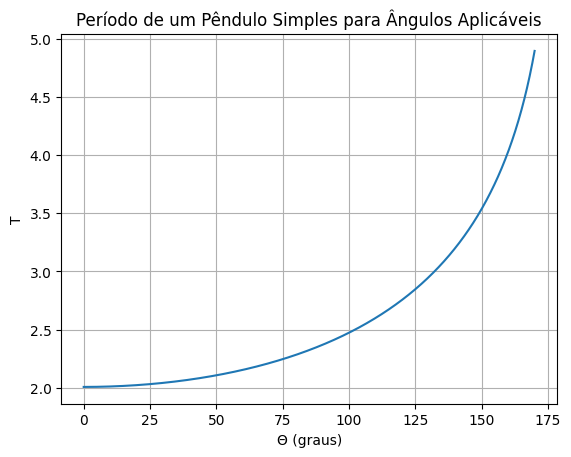

In [ ]:
# Gráfico de T em função de Θ
theta_graus = np.linspace(0, 170, 1000)
theta_radiano = np.deg2rad(theta_graus)
k_valores = np.sin(theta_radiano / 2)
T_valores = [4 * math.sqrt(l / g) * 0.5 * (f(a, k) + f(b, k) + 2 * sum(f(a + i * h, k) for i in range(1, n - 1))) * h for k in k_values]

plt.figure()
plt.plot(theta_graus, T_valores)
plt.xlabel("Θ (graus)")
plt.ylabel("T")
plt.title("Período de um Pêndulo Simples para Ângulos Aplicáveis")
plt.grid(True)
plt.show()

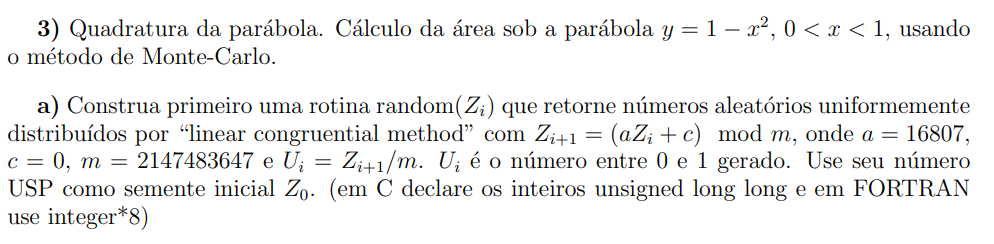

In [ ]:
def numeros_aleatorios(Z0, n):
  a = 16807
  m = 2147483647
  c = 0
  Z = Z0
  U_valores = []
  for _ in range(n):
    Z = (a * Z + c) % m
    U = Z / m
    U_valores.append(U)
  return U_valores

In [ ]:
Z0 = 8669592
n = 1000
df_numeros_aleatorios = numeros_aleatorios(Z0, n)
df_numeros_aleatorios[:15]

[0.8514283205622007,
 0.9557836889083421,
 0.8564594825061315,
 0.5145224805523281,
 0.5793306429774178,
 0.8101165214600584,
 0.6283761792017036,
 0.1184438430324401,
 0.6856698462207196,
 0.05310543163358487,
 0.5429894656608764,
 0.023949362348741555,
 0.5169329952993118,
 0.09285199553372897,
 0.5634889353827988]

In [ ]:

# Semente inicial
Z0 = 8669592

# Número de valores aleatórios a serem gerados
n = 1000

# Gerar números aleatórios
valores_aleatorios = numeros_aleatorios(Z0, n)

# Exibir os primeiros 10 valores gerados
print(valores_aleatorios[:10])


[0.8514283205622007, 0.9557836889083421, 0.8564594825061315, 0.5145224805523281, 0.5793306429774178, 0.8101165214600584, 0.6283761792017036, 0.1184438430324401, 0.6856698462207196, 0.05310543163358487]


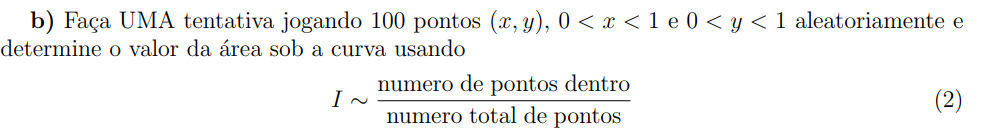

In [ ]:
n = 100
pontos_dentro = 0
for _ in range(n):
    x = random.uniform(0, 1)
    y = random.uniform(0, 1)
    if y <= 1 - x**2:
        pontos_dentro += 1
area_estimada = (pontos_dentro / n)
print("Área estimada: ", area_estimada)

Área estimada:  0.64


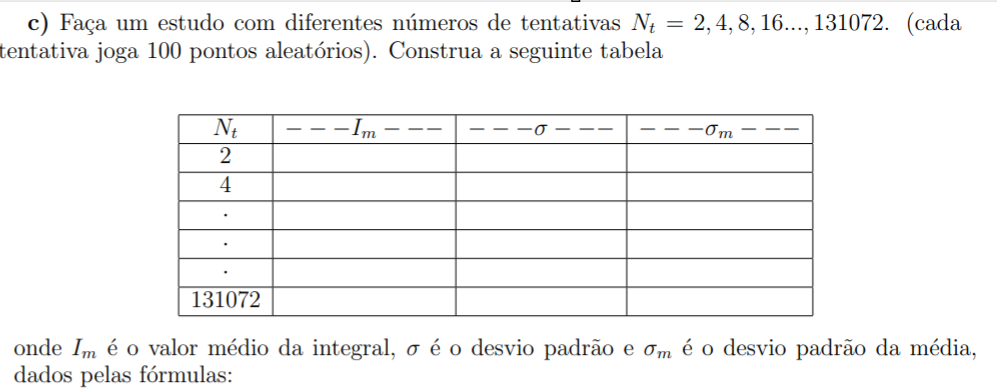

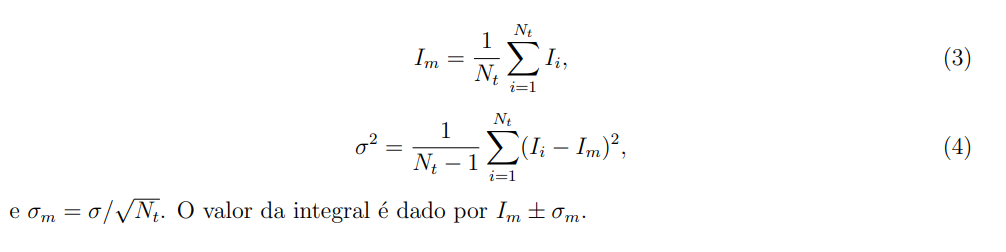

In [ ]:
def calcular_area(n):
  pontos_dentro = 0
  for u in range(n):
    x = random.uniform(0, 1)
    y = random.uniform(0, 1)
    if y <= 1 - x**2:
      pontos_dentro += 1
  return pontos_dentro / n

In [ ]:
Nt_valores = [2**i for i in range(1, 18)]
resultados = []
for Nt in Nt_valores:
  valores_integral = []
  for _ in range(100):  # Realizar 100 repetições para cada Nt
    integral = calcular_area(Nt)
    valores_integral.append(integral)
  media_integral = np.mean(valores_integral)
  desvio_padrao = np.std(valores_integral, ddof=1)
  desvio_padrao_media = desvio_padrao / np.sqrt(Nt)
  intervalo_confianca = (media_integral - desvio_padrao_media, media_integral + desvio_padrao_media)
  resultados.append([Nt, media_integral, desvio_padrao, desvio_padrao_media, intervalo_confianca[0], intervalo_confianca[1]])
df = pd.DataFrame(resultados, columns=["Nt", "Im", "σ", "σm", "Limite Inferior", "Limite Superior"])
df

,Nt,Im,σ,σm,Limite Inferior,Limite Superior
0,2,0.685000,0.330709,0.233847,0.451153,0.918847
1,4,0.665000,0.228135,0.114067,0.550933,0.779067
2,8,0.681250,0.162228,0.057356,0.623894,0.738606
3,16,0.686250,0.107331,0.026833,0.659417,0.713083
4,32,0.664687,0.091875,0.016241,0.648446,0.680929
5,64,0.663906,0.054648,0.006831,0.657075,0.670737
6,128,0.670781,0.036611,0.003236,0.667545,0.674017
7,256,0.666680,0.030304,0.001894,0.664786,0.668574
8,512,0.667559,0.020151,0.000891,0.666668,0.668449
9,1024,0.665156,0.014327,0.000448,0.664709,0.665604
